In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker

In [ ]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  

In [3]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data\\Zero_Shot", "comments_zero_shot_consolidation.csv") 

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.931962,olumlu,0.963947,olumlu,0.947954,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumsuz,-0.669085,olumlu,0.991367,olumlu,0.161141,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.906424,olumlu,0.974138,olumlu,0.940281,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.999406,olumlu,0.791039,olumsuz,-0.104184,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503


In [ ]:
df_comments['final_label'] = df_comments.apply(
    lambda row: row['ZeroShot_label'] 
    if row['bert_label'] == row['ZeroShot_label'] 
    else None,   
    axis=1
)

df_comments['final_skor'] = df_comments.apply(
    lambda row: (row['bert_skor'] + row['ZeroShot_skor']) / 2 
    if row['bert_label'] == row['ZeroShot_label'] 
    else None,   
    axis=1
)

In [5]:
df_comments.head(15)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.931962,olumlu,0.963947,olumlu,0.947954,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumsuz,-0.669085,olumlu,0.991367,olumlu,0.161141,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,None,NaN
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.906424,olumlu,0.974138,olumlu,0.940281,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.999406,olumlu,0.791039,olumsuz,-0.104184,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843
5,31 Ocak 2025,163cm,45,XS,Çok rahat efıl efıl mükemmel,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Çok rahat efıl efıl mükemmel,28,çok rahat efıl efıl mükemmel,olumlu,0.987008,olumlu,0.995842,olumlu,0.991425,olumlu,0.995900,olumlu,0.936610,olumlu,0.977844,olumlu,0.970118,olumlu,0.980772
6,28 Ocak 2025,Bilgi mevcut değil,Bilgi mevcut değil,S,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,60,170 60 kiloyum s beden aldım dar olsun diye gayet güzel ürün,olumsuz,-0.994993,olumlu,0.991931,olumsuz,-0.001531,olumlu,0.99753

In [ ]:
filtered_df = df_comments[df_comments['final_label'].isnull()][['Yorum_V1', 'bert_skor', 'ZeroShot_skor']]

filtered_df['ortalama_skor'] = (filtered_df['bert_skor'] + filtered_df['ZeroShot_skor']) / 2
filtered_df['skor_toplami'] = filtered_df['bert_skor'] + filtered_df['ZeroShot_skor']
filtered_df['skor_toplami_abs'] = filtered_df['skor_toplami'].abs()

filtered_df.head(25)

,Yorum_V1,bert_skor,ZeroShot_skor,ortalama_skor,skor_toplami,skor_toplami_abs
2,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,-0.019614,0.924882,0.452634,0.905268,0.905268
6,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,-0.001531,0.946338,0.472404,0.944807,0.944807
10,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,-0.139425,0.856509,0.358542,0.717084,0.717084
16,Elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 kiloyum normalde m-l giyerim.Bir puan kumaştam dolayı kırdım takılsa ya da çekiştirseniz aşağı yukarı anında yırtılacak gibi bu kadar ince olmasına rağmen de sıcak tutuypr garip bir şekilde. Sıfır kol olan modeli de alıcam.,-0.022470,0.947116,0.462323,0.924646,0.924646
22,"4 aylık hamileyim,normalde de L beden giyerim L beden bile bol geldi tam oturmadı onun dışında çok büyük ihtimalle giyilmiş ürün gönderilmiş çünkü üstünde etiket yoktu, tüyler vardı ama elbise güzel beğendim",-0.104627,0.844909,0.370141,0.740282,0.740282
25,160 boy 45 kiloyum s beden geniş geldi onun haricinde ürün çok iyikumaşı vs,-0.191502,0.917518,0.363008,0.726016,0.726016
31,Dokusu üstte duruşu çok güzel normalde bedenim S o da tam oldu lakin ben bir tık bol istedim M aldım o daha hoş durdu üzerime yapışsın diyorsanız kendi bedeninizi alabilirsiniz,-0.162783,0.938531,0.387874,0.775748,0.775748
35,Elbise çok güzel zayıf gösteriyor duruşu güzel fakat biraz ağır,-0.071908,0.917648,0.422870,0.845740,0.845740
40,Ürün çok güzel boyu 160 165 olanlara bir tık uzun olabilir bana da uzun oldu ama güzel ürünün yazlık beyaz ve hakisini de almıştım çok güzel,-0.017164,0.956508,0.469672,0.939344,0.939344
42,Yaka kısmı pek hoş durmuyor onun dışında vücudu saran güzel bir elbise,-0.022942,0.265637,0.121347,0.242695,0.242695


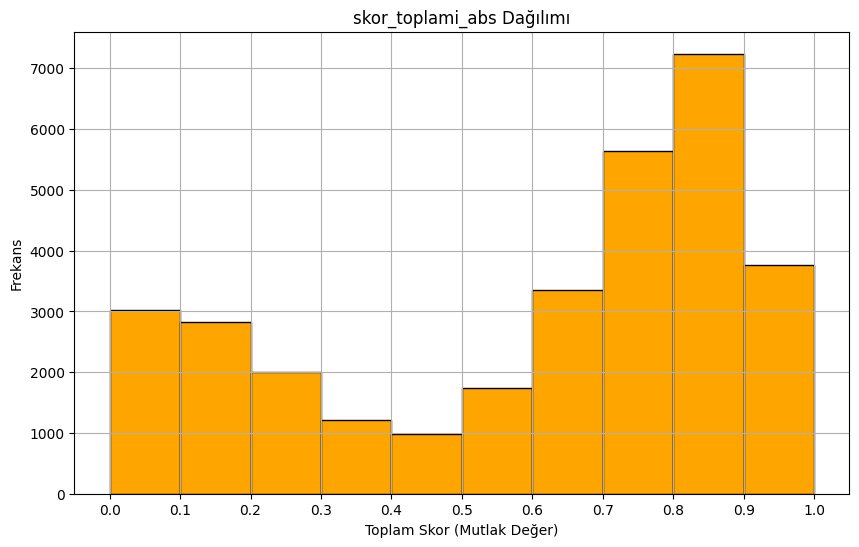

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['skor_toplami_abs'], bins=np.arange(0, filtered_df['skor_toplami_abs'].max() + 0.1, 0.1), color='orange', edgecolor='black')

plt.title('skor_toplami_abs Dağılımı')
plt.xlabel('Toplam Skor (Mutlak Değer)')
plt.ylabel('Frekans')

plt.xticks(np.arange(0, filtered_df['skor_toplami_abs'].max() + 0.1, 0.1))

plt.grid(True)
plt.show()

In [18]:
filtered_df[filtered_df["ortalama_skor"]==0]

,Yorum_V1,bert_skor,ZeroShot_skor,ortalama_skor,skor_toplami,skor_toplami_abs


In [ ]:
df = filtered_df[filtered_df["skor_toplami_abs"] <= 0.30]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5845 entries, 58 to 109137
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Yorum_V1          5845 non-null   object 
 1   bert_skor         5845 non-null   float64
 2   ZeroShot_skor     5845 non-null   float64
 3   ortalama_skor     5845 non-null   float64
 4   skor_toplami      5845 non-null   float64
 5   skor_toplami_abs  5845 non-null   float64
dtypes: float64(5), object(1)
memory usage: 319.6+ KB


In [ ]:
def assign_label_and_score(row):
    if pd.isna(row['final_label']):
        bert_skor = row['bert_skor']
        zero_skor = row['ZeroShot_skor']
        toplam_skor = bert_skor + zero_skor

        if abs(toplam_skor) <= 0.30:
            ort_skor = toplam_skor / 2
            label = 'olumsuz' if ort_skor < 0 else 'olumlu'
            return pd.Series([label, ort_skor])
        else:
            if abs(bert_skor) > abs(zero_skor):
                return pd.Series([row['bert_label'], bert_skor])
            else:
                return pd.Series([row['ZeroShot_label'], zero_skor])
    
    return pd.Series([row['final_label'], row['final_skor']])

In [20]:
df_comments[['final_label', 'final_skor']] = df_comments.apply(assign_label_and_score, axis=1)

In [22]:
df_comments[(df_comments["bert_label"]=="olumsuz") & (df_comments["ZeroShot_label"]=="olumlu")].head(25)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
6,28 Ocak 2025,Bilgi mevcut değil,Bilgi mevcut değil,S,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,60,170 60 kiloyum s beden aldım dar olsun diye gayet güzel ürün,olumsuz,-0.994993,olumlu,0.991931,olumsuz,-0.001531,olumlu,0.997532,olumlu,0.872095,olumlu,0.969388,olumlu,0.946338,olumlu,0.946338
10,06 Aralık 2024,163cm,60,S,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,62,çok zarif bir neden büyük alabilirsiniz sıkmasını istemiyosanz,olumsuz,-0.969913,olumlu,0.691063,olumsuz,-0.139425,olumlu,0.988013,olumlu,0.703000,olumlu,0.878516,olumlu,0.856509,olumlu,0.856509
16,27 Eylül 2024,Bilgi mevcut değil,Bilgi mevcut değil,M,Elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 kiloyum normalde m-l giyerim.Bir puan kumaştam dolayı kırdım takılsa ya da çekiştirseniz aşağı yukarı anında yırtılacak gibi bu kadar ince olmasına rağmen de sıcak tutuypr garip bir şekilde. Sıfır kol olan modeli de alıcam.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 kiloyum normalde m-l giyerim.Bir puan kumaştam dolayı kırdım takılsa ya da çekiştirseniz aşağı yukarı anında yırtılacak gibi bu kadar ince olmasına rağmen de sıcak tutuypr garip bir şekilde. Sıfır kol olan modeli de alıcam.,322,elbise çok güzel iyi ki m beden almışım aşırı esnek bir kumaşı var s alsam bile olurmuş.165 boy 67 kiloyum normalde m-l giyerim.bir puan kumaştam dolayı kırdım takılsa ya da çekiştirseniz aşağı yukarı anında yırtılacak gibi bu kadar ince olmasına rağmen de sıcak tutuypr garip bir şekilde. sıfır kol olan modeli de alıcam.,olumsuz,-0.952109,olumlu,0.907169,olumsuz,-0.022470,olumlu,0.991833,olumlu,0.905853,olumlu,0.943662,olumlu,0.947116,olumlu,0.947116
22,26 Aralık 2024,Bilgi mevcut değil,Bilgi mevcut değil,L,"4 aylık hamileyim,normalde de L beden giyerim L beden bile bol geldi tam oturmadı onun dışında çok büyük ihtimalle giyilmiş ürün gönderilmiş çünkü üstünde etiket yoktu, tüyler vardı ama elbise güzel beğendim",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"4 aylık hamileyim,normalde de L beden giyerim L beden bile bol geldi tam oturmadı onun dışında çok büyük ihtimalle giyilmiş ürün gönderilmiş çünkü üstünde etiket yoktu, tüyler vardı ama elbise güzel beğendim",207,"4 aylık hamileyim,normalde de l beden giyerim l beden bile bol geldi tam oturmadı onun dışında çok büyük ihtimalle giyilmiş ürün gönd

In [21]:
df_comments.head(25)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.931962,olumlu,0.963947,olumlu,0.947954,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumsuz,-0.669085,olumlu,0.991367,olumlu,0.161141,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.906424,olumlu,0.974138,olumlu,0.940281,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.999406,olumlu,0.791039,olumsuz,-0.104184,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843
5,31 Ocak 2025,163cm,45,XS,Çok rahat efıl efıl mükemmel,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Çok rahat efıl efıl mükemmel,28,çok rahat efıl efıl mükemmel,olumlu,0.987008,olumlu,0.995842,olumlu,0.991425,olumlu,0.995900,olumlu,0.936610,olumlu,0.977844,olumlu,0.970118,olumlu,0.980772
6,28 Ocak 2025,Bilgi mevcut değil,Bilgi mevcut değil,S,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,170 60 kiloyum S beden aldım dar olsun diye gayet güzel ürün,60,170 60 kiloyum s beden aldım dar olsun diye gayet güzel ürün,olumsuz,-0.994993,olumlu,0.991931,olumsuz,-0.001531,olumlu,

In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data")
file_name = "comments_final_labels.csv"
file_path = os.path.join(comment_path, file_name)
df_comments.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

comments_final_labels.csv olarak kaydedildi.
